In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import VarianceThreshold, f_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
import collections
%matplotlib inline

In [2]:
# Import data
data = pd.read_csv("train.csv")

# 1. Data Overview (tu trzeba będzie dodać jeszcze jakiś opis co tak naprawdę chcemy zrobić, skąd wzięliśmy dataset itd.) 

At first we have a brief look at the initial form of our data, so to get sense how we should prepare our data to make it suitable for the modelling


In [3]:
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Number of rows is:

In [4]:
data.shape[0]

1460

Types of variables in dataset, it is really long so we will only show the number of variables in specific group:

In [5]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Now we know that our data has 81 columns and 1460 rows. The number of columns is definetely too big for the purpose of this analysis. So our first task will be to select the limited number of features which will suit our model in the best way.

# 2. Data preparation

## 2.1. Dependent variable SalePrice overview

Our dependent variable is SalePrice, which is the price the house were sold. Here are some basic information about it 

In [6]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

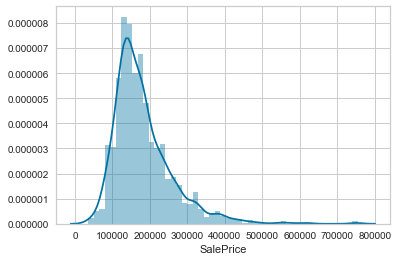

In [7]:
sns.distplot(data["SalePrice"])

In [8]:
print("The skewness is:",data.SalePrice.skew())
print("The kurtosis is:",data.SalePrice.kurt())

The skewness is: 1.8828757597682129
The kurtosis is: 6.536281860064529


So we can see that our dependent variable does not have a perfect normal distribution. We can try improving it by log normalization 


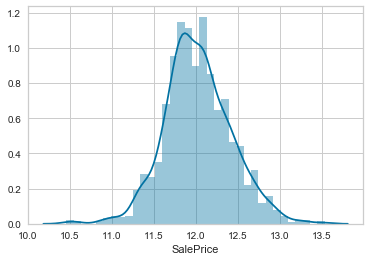

In [9]:
sns.distplot(np.log1p(data.SalePrice))

We can see that actually the log normalized distribution of dependent variable seems to be closer to the normal distribution. We will not modify SalesPrice variable now. But just in case we will save the log normalized one in memory

In [10]:
log1SalePrice = np.log1p(data.SalePrice)

## 2.2. Clearing the dataset of redundant variables and missings

### 2.2.1. Dropping redundant variables (numerical)

Having in mind that we have 81 variables in our data frame it would be useful to remove some of them to simplify the analysis. First we can get rid of Id variable which is surely not going to bring us anything important. 

In [11]:
data = data.drop(columns = "Id")

In [12]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now we can take a look at the correlation matrix for continous variables.

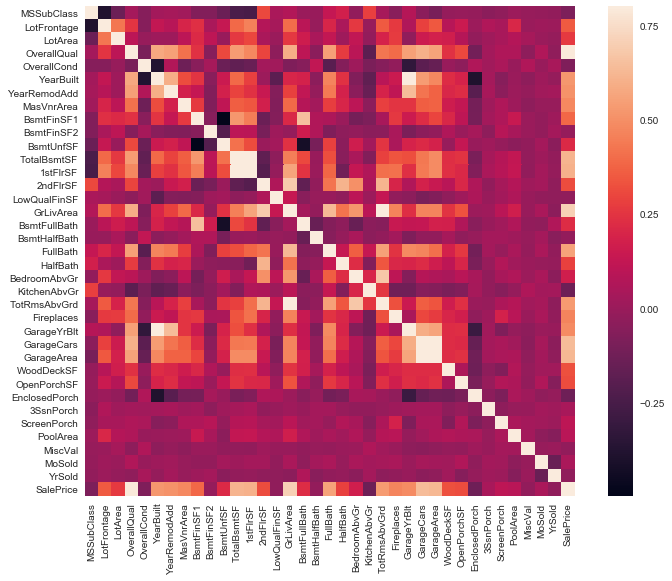

In [13]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

There is a high correlation between variables GarageArea/GarageCars and 1stFlrSF/TotalBsmtSF. 
1. First let's take a look at Garage variables. It is pretty obvious GarageCars which is "Size of garage in car capacity" is correlated with the area of garage. Therefore there is no need to keep both variables 
2. The second relations is between the total sq feet of First floor and total sq feet of basement. It's again pretty self explanatory that those variables are correlated. 
3. We decide to remove the variable GarageCars and TotalBsmtSF
There is also a high correlation between YearBuilt and GarageYrBlt - most of the garages were built at the same time as the original construction. Therefore, we will dispose "GarageYrBlt".

In [14]:
data = data.drop(columns = ["GarageCars", "TotalBsmtSF", "GarageYrBlt"])

### 2.2.2. Dealing with NAs

Now we will look for association between categorical data. In order to do that, firstly we will put "NA" value into such columns for which NaN value does not mean missing data, eg. for "Pool quality" NaN means there is no pool and not missing data.

In [15]:
na_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for nas in na_cols:
    if "Bsmt" in nas:
        data[nas] = data[nas].fillna("No basement")
    elif "Garage" in nas:
        data[nas] = data[nas].fillna("No garage")
    else:
        data[nas] = data[nas].fillna("No {}".format(nas))

categorical_df = data.select_dtypes(include='object')
col_names = categorical_df.columns.values.tolist()

Now we can assess if there are some other NA values in dataset which are now surely just missings

In [16]:
na_percantage = dict((data.isna().sum()/data.shape[0])*100)
na_percantage 
na_percentage_sorted = sorted(na_percantage.items(), key=lambda kv: kv[1], reverse=True)
na_percentage_sorted = collections.OrderedDict(na_percentage_sorted)
na_percentage_sorted

OrderedDict([('LotFrontage', 17.73972602739726),
             ('MasVnrType', 0.547945205479452),
             ('MasVnrArea', 0.547945205479452),
             ('Electrical', 0.0684931506849315),
             ('MSSubClass', 0.0),
             ('MSZoning', 0.0),
             ('LotArea', 0.0),
             ('Street', 0.0),
             ('Alley', 0.0),
             ('LotShape', 0.0),
             ('LandContour', 0.0),
             ('Utilities', 0.0),
             ('LotConfig', 0.0),
             ('LandSlope', 0.0),
             ('Neighborhood', 0.0),
             ('Condition1', 0.0),
             ('Condition2', 0.0),
             ('BldgType', 0.0),
             ('HouseStyle', 0.0),
             ('OverallQual', 0.0),
             ('OverallCond', 0.0),
             ('YearBuilt', 0.0),
             ('YearRemodAdd', 0.0),
             ('RoofStyle', 0.0),
             ('RoofMatl', 0.0),
             ('Exterior1st', 0.0),
             ('Exterior2nd', 0.0),
             ('ExterQual', 0.0),
       

As we can see now there are few variables which contain NA values. It's mostly the problem in case of variable LotFrontage which has 17% of missings. It's not really important variable so we will just drop it. For the other 3 variables we will drop rows with missing values

In [17]:
data = data.drop(columns='LotFrontage')
data = data.dropna()

### 2.2.3. Dropping redundant variables (categorogical)

After that, we can calculate Cramer's V matrix, which contains measure of association between categorical features. Cramer's V is similar to correlation as the output is in the range of [0,1], where 0 indicates no association and 1 full association. Naturally, Cramer's V matrix is symmetrical.

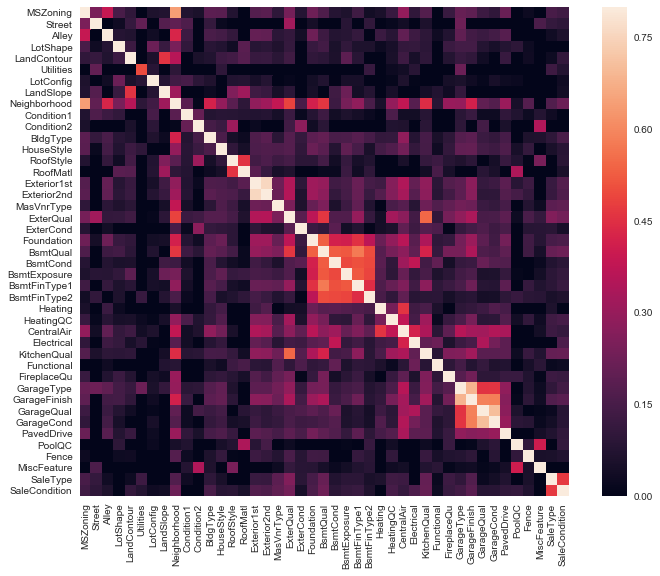

In [18]:
# source for cramers_v function in python:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

corrmat = pd.DataFrame(0, index=col_names, columns=col_names).astype('float64')

for i, column_i in enumerate(categorical_df):
    for j, column_j in enumerate(categorical_df):
        corrmat.iloc[i][column_j] = cramers_v(categorical_df[column_i], categorical_df[column_j])

f, ax = plt.subplots(figsize=(12, 9))    
sns.heatmap(corrmat, vmax=.8, square=True);

Again, we can extract a few variables that seem to be strongly associated. 
1. Exterior1st and Exterior2nd - both variables concern one feature, so we decided to leave just one in our analysis.
2. GarageQual and GarageCond - rather unsurprisingly, garage quality corresponds with garage condition. Therefore we decided to omit GarageCond.
3. GarageType and GarageFinish - interior finish of the garage seems to be correlated with garage location. Thus, we will only usue GarageType.

In [19]:
data = data.drop(columns = ["Exterior2nd", "GarageCond", "GarageFinish"])

## 2.3. One hot encoding


We have already dealt with some issues which were present in our dataset, removing NAs and some highly correlated variables. The next step is to introduce a proper approach to work with categorogical variables which are higly represented in our case. We decided to use One Hot Encoding to solve this

In [20]:
nominal_variables = []
num_variables = []
for i in data.columns:
    if str(data[i].dtypes) == "object":
        nominal_variables.append(i)
        print(i,":", data[i].unique(), ";" ,len(data[i].unique()))
    else:
        num_variables.append(i)
data = pd.concat([data[num_variables], pd.get_dummies(data[nominal_variables])], axis=1)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH'] ; 5
Street : ['Pave' 'Grvl'] ; 2
Alley : ['No Alley' 'Grvl' 'Pave'] ; 3
LotShape : ['Reg' 'IR1' 'IR2' 'IR3'] ; 4
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS'] ; 4
Utilities : ['AllPub' 'NoSeWa'] ; 2
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] ; 5
LandSlope : ['Gtl' 'Mod' 'Sev'] ; 3
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] ; 25
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] ; 9
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] ; 8
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] ; 5
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] ; 8
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] ; 6
RoofMatl : ['CompShg' 'WdSh

# 3. Linear Regression

## 3.1. Feature Selection

After all the operations conducted above we were left with 272 independent features. That put as in a position to use a technique to cut down this number to simplify analysis. We decided to use Forward Feature Selection Method. The code which is the implementation of that is presented below. We set the limit for the acceptable pvalue for 0.05

In [21]:
X = data.loc[:, data.columns != 'SalePrice'] 
y = data.SalePrice

In [22]:
final = {}
Xx = X.copy()
i = 0
f = 0
while f != 1:
    print(i)
    working_dict = {}
    
    features = list(Xx.columns)
    
    
    for feature in features:
        
        names = list(final.keys())
        names.append(feature)

        X2 = sm.add_constant(X.loc[:, names])
        est = sm.OLS(y, X2)

        results = est.fit()
        temp = dict(results.pvalues)

        for k, v in temp.items():
            if k in final:
                pass
            else:
                working_dict[k] = v

        working_dict.pop("const")
    
    sorted_x = sorted(working_dict.items(), key=lambda kv: kv[1])
    
    
    
    
    
    if sorted_x[0][1] <= 0.05:
        final[sorted_x[0][0]] = sorted_x[0][1]
        Xx.drop(labels = sorted_x[0][0], axis = 1, inplace = True)
        i += 1
    else:
        f += 1
        
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


The Forward Feature Selection Method gave us 58 independent variables. Now we can limit our dataset to them + the dependent variable. 

In [23]:
data1 = data[["SalePrice"] + list(final.keys())]

In [24]:
data1.head()

,SalePrice,OverallQual,GrLivArea,BsmtQual_Ex,BsmtFinSF1,RoofMatl_ClyTile,YearBuilt,MSSubClass,Condition2_PosN,KitchenQual_Ex,...,ScreenPorch,MasVnrType_None,FireplaceQu_No FireplaceQu,WoodDeckSF,GarageQual_Ex,Condition2_PosA,RoofMatl_Membran,Condition1_RRAe,Fence_GdPrv,YearRemodAdd
0,208500,7,1710,0,706,0,2003,60,0,0,...,0,0,1,0,0,0,0,0,0,2003
1,181500,6,1262,0,978,0,1976,20,0,0,...,0,1,0,298,0,0,0,0,0,1976
2,223500,7,1786,0,486,0,2001,60,0,0,...,0,0,0,0,0,0,0,0,0,2002
3,140000,7,1717,0,216,0,1915,70,0,0,...,0,1,0,0,0,0,0,0,0,1970
4,250000,8,2198,0,655,0,2000,60,0,0,...,0,0,0,192,0,0,0,0,0,2000


# 4. Lasso Regression

The alternative way than Linear Regression to handle our regression task is to use Lasso Regression. This method doesn't need feature selection before modelling because it deals with this issue with by itself using L1 regularization. We will start from splitting our dataset into test and training groups and then perform kfold cross validation with Lasso Regression

## 4.1. Creating Test and Training sets

In [25]:
X_lasso = data.loc[:, data.columns != 'SalePrice'] 
y_lasso = data.SalePrice

X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_lasso, y_lasso, test_size=0.3, random_state=42)

## 4.2. Kfold Cross Validation with Lasso Regression

Now we will conduct our modelling. We have to specify the vector of different  "alphas" which will be used in Lasso Regression to find the best one (the higher the alpha the the more feature coefficient are 0)  

In [26]:
# inspiration: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8
lasso = Lasso()
params = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4,1e-2,1, 2, 5, 10,20, 40, 50, 100, 1000]}
lasso_regression = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error')
lasso_regression.fit(X_lasso_train, y_lasso_train)

C:\Users\user\Anaconda31\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1, 2, 5, 10, 20, 40, 50, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
print("best score: ", lasso_regression.best_score_,"\nbest params: ", lasso_regression.best_params_)

best score:  -1215344603.8174253 
best params:  {'alpha': 100}


In [28]:
y_lasso_predict = lasso_regression.predict(X_lasso_test)

In [29]:
def my_custom_loss_func(y_true, y_pred):
    diff = np.abs(y_true - y_pred).max()
    return np.log1p(diff)

In [30]:
my_custom_loss_func(y_lasso_test, y_lasso_predict)

12.938435311882259

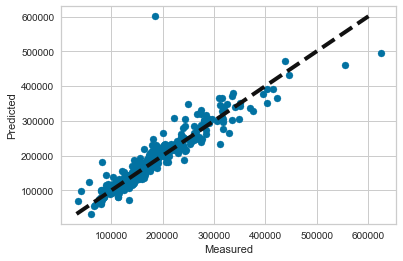

In [31]:
fig,ax = plt.subplots()
ax.scatter(y_lasso_test, y_lasso_predict)
ax.plot([y_lasso_predict.min(), y_lasso_predict.max()], [y_lasso_predict.min(), y_lasso_predict.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

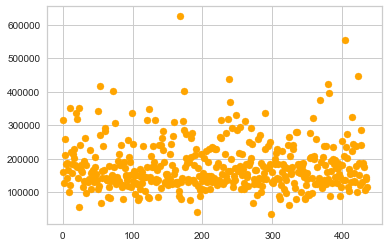

In [45]:
plt.scatter(*zip(*list(enumerate(y_lasso_test))), c = "orange")

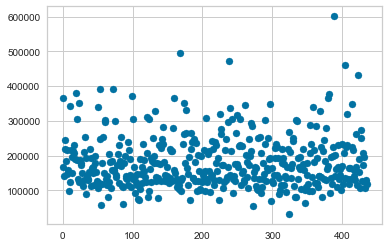

In [46]:
plt.scatter(*zip(*list(enumerate(y_lasso_predict))))

In [57]:
residuals = []
for i in range(0, len(y_lasso_predict)):
    residuals.append((i,list(y_lasso_test)[i]-list(y_lasso_predict)[i]))
    

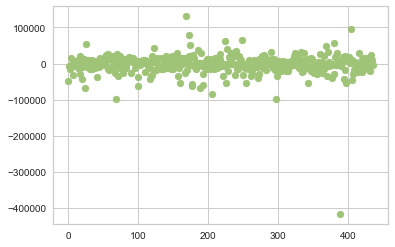

In [60]:
plt.scatter(*zip(*residuals), c= "g")

# Rzeczy do zrobienia

KK 21.05.2019
Zrobione: przejrzałam całość, dodałam jeszcze association dla danych typu categorical bo tutaj też są niepotrzebne zmienne, usunęłam rok zbudowania garażu.
Feature selection rzeczywiście trzeba będzie zrobić za pomocą nested cross-validation, ale to już jutro.

G. 22.05.2019. 
1. Moim zdaniem możemy już przechodzić do modelowania. Ja jestem, żeby przeprowadzić je przy pomocy k-folds cross validation.  
2. Oczywiście zostają nam też dwie inne regresje (cały czas obstaję przy Lasso i Ridge). 

G. 23.05.2019 

1. Kasia, jakbyś zrobiła linear regression zwykłe. Plus pozbyła sie outlierów w tej części, gdzie pozbywamy się nieprzydatnych danych. Czyli rozdział 2. 
2. Trzeba jeszcze zrobić Ridge Regression. No i jeszcze dopracować w ogóle sposób wizualizacji tych danych i porównywania wyników. 
3. Będzie potrzebny rozdział gdzie porównamy 3 modele. 